# Tutorial en epidemiológia matématica

## Session 1: numerical simulation of systems of differential equations

Last update: December 11, 2024

Author: Imelda Trejo



In [ ]:
#Load modules

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import fsolve


OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)


## 1.1 Model formulation and  implementation

We assume that infectious period and recoverying time follow exponential-distributions. It implies that our model formulation is a system of ordinary differential equations (ODEs).

We describe the evolution of the outbreak with the number of individuals who are susceptible $S(t)$, infected $I(t)$, and recovered $R(t)$ in the population of fixed size $N=S(t)+I(t)+R(t)$
through the system of differential equations:  

\begin{eqnarray}
\frac{d}{dt} S(t) &=& - \frac{\beta }{N} S(t) I(t) \label{eq:S}\\
\frac{d}{dt} I(t) &=& \frac{\beta}{N} S(t)I(t) - \gamma  I(t)  \label{eq:I}\\
\frac{d}{dt} R(t) &=& \gamma  I(t) \label{eq:R}.
\end{eqnarray}
with initial conditions $S(0)$, $I(0)$ and $R(0)=0$.

The model parameters are: disease transmission rate ($\beta$), naturally recovered from infection ($\gamma$),  and population size ($N$).


### Model Implementation

In [ ]:
def SIHR(y, t, par):
    """:param par: vector with 3 parameters
       :param t: time spand for the numerical simulation
       :param y: vector with 3 model variables (compartments: S,I,R)
       return y: ODEs solution"""

    beta,popsize,recrate=par[0],par[1],par[2]

    S,I,R=y[0],y[1],y[2]

    dS = -beta*S*I/popsize

    dI = beta*S*I/popsize - recrate*I

    dR= recrate*I

    return [dS, dI, dR]


## 1.2 Numerical simulations

We use the following parameter values:
$\beta=0.2$, $\gamma=1/7$, and $N= 10,000$.

In [ ]:
#CODE

#Setting the ODE's Parameter Values

beta=0.2           #tranasmision rate
N=10000            #population size
recRate=1/7        #recovered naturally rate

#ODEs Initial conditions

I0=1               #initial infected mild people
S0=N-I0            #initial susceptible people
R0=0          #initial hospitalized and recovered people

#Set up the time spand of the numerical simulation

t_final=500        #time end of the numerical simulation in days
times = np.arange(0,t_final,0.1)


el Numéro reproductor básico es 1.4000000000000001


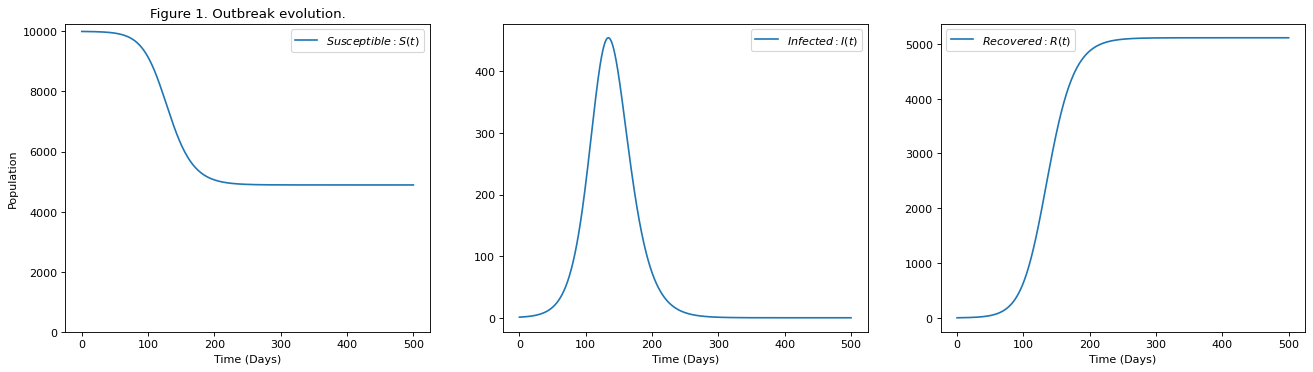

In [ ]:
print("el Numéro reproductor básico es",beta/recRate)
# New Section

# Create epidemic curves

y = odeint(SIHR, t=times, y0=[S0, I0, R0], args=((beta,N,recRate),),rtol=1e-8)

fig=plt.figure(figsize=(20,5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,3,1)
ax.set_title('Figure 1. Outbreak evolution.',fontsize=12)
ax.plot(times, y[:,0], color='C0', alpha=1, label=f'$Susceptible: S(t)$')
plt.ylim(0)
ax.legend()
ax.set_ylabel("Population")
ax.set_xlabel("Time (Days)")

ax = fig.add_subplot(1,3,2)
ax.plot(times, y[:,1], "-",color ='C0' ,alpha=1, label=f'$Infected: I(t)$')
ax.legend()
ax.set_xlabel("Time (Days)")

ax = fig.add_subplot(1,3,3)
ax.plot(times, y[:,2],"-" ,color ='C0', alpha=1, label=f'$Recovered: R(t)$')
ax.legend()
ax.set_xlabel("Time (Days)")

plt.show()

Your turn: re-run the numerical simulation by changing parameter values, such that the reprodcuction numerber is less that one.

In [ ]:
beta= .2         #tranasmision rate
recRate=1/7        #recovered naturally rate
print("el num'ero reproductor b'asico es",beta/recRate)